In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("pharm_stock.csv")
df.shape

(137, 37)

In [3]:
df.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2020.05)',
       'PBRlBPS (2020.05)', '배당수익률l2019.11', 'PERlEPS(2020.03)',
       'PBRlBPS (2020.03)', '배당수익률l2020.06', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)', 'PERlEPS(2018.12)', 'PBRlBPS (2018.12)'],
      dtype='object')

In [4]:
df["시가총액(억원)"] = df["시가총액"].str.split("억원", expand=True)[0]
df[["시가총액", "시가총액(억원)", '시가총액순위']].head()

,시가총액,시가총액(억원),시가총액순위
0,"3,735 억원","3,735",코스피 344위
1,"2,370 억원","2,370",코스피 444위
2,"2조 3,182 억원","2조 3,182",코스닥 14위
3,"3조 8,815 억원","3조 8,815",코스피 61위
4,474 억원,474,코스피 931위


In [5]:
df["코스피/코스닥"] = df['시가총액순위'].str.split(" ", expand=True)[0]
df["시가총액순위(전처리)"] = df['시가총액순위'].str.split(" ", expand=True)[1]
df[["시가총액", "시가총액(억원)", '시가총액순위', '코스피/코스닥', '시가총액순위(전처리)']].head()

,시가총액,시가총액(억원),시가총액순위,코스피/코스닥,시가총액순위(전처리)
0,"3,735 억원","3,735",코스피 344위,코스피,344위
1,"2,370 억원","2,370",코스피 444위,코스피,444위
2,"2조 3,182 억원","2조 3,182",코스닥 14위,코스닥,14위
3,"3조 8,815 억원","3조 8,815",코스피 61위,코스피,61위
4,474 억원,474,코스피 931위,코스피,931위


In [6]:
df["액면가"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[0]
df["매매단위"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[1]
df["액면가"] = df["액면가"].str.replace("원", "")
df["액면가"] = df["액면가"].str.replace(",", "")

In [7]:
df["시가총액순위(전처리)"] = df["시가총액순위(전처리)"].str.replace("위", "").astype(int)

In [8]:
df["52주최고"] = df["52주최고l최저"].str.split("  l  ", expand=True)[0]
df["52주최저"] = df["52주최고l최저"].str.split("  l  ", expand=True)[1]

In [9]:
df["52주최고(int)"] = df["52주최고"].str.replace(",", "").astype(int)
df["52주최저(int)"] = df["52주최저"].str.replace(",", "").astype(int)

df["52주차액"] = df["52주최고(int)"] - df["52주최저(int)"]
df["52주차액비율"] = df["52주최고(int)"] / df["52주최저(int)"]

df["현재-최고가"] = df["현재가"] - df["52주최고(int)"]
df["현재/최고가비율"] =  df["현재가"] / df["52주최고(int)"] 


df[['종목명', '현재가','코스피/코스닥', "52주최고(int)", "52주최저(int)", "52주차액", "52주차액비율", "현재/최고가비율"]].sort_values(
    "52주차액비율", ascending=False).head(30)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재/최고가비율
134,신풍제약우,166500.0,코스피,280000,5310,274690,52.730697,0.594643
135,신풍제약,126500.0,코스피,214000,6010,207990,35.607321,0.591121
123,녹십자홀딩스2우,138000.0,코스피,287000,12350,274650,23.238866,0.480836
54,신일제약 *,27600.0,코스닥,58100,4500,53600,12.911111,0.475043
4,일양약품우,106500.0,코스피,167000,15600,151400,10.705128,0.637725
80,유나이티드제약,72500.0,코스피,112000,10750,101250,10.418605,0.647321
2,메드팩토 *,114000.0,코스닥,134200,14675,119525,9.144804,0.849478
20,메디포럼제약 *,17500.0,코스닥,21500,2665,18835,8.067542,0.813953
61,우리들제약,14950.0,코스피,33650,4290,29360,7.843823,0.444279
122,동화약품,21850.0,코스피,34450,4800,29650,7.177083,0.634253


In [10]:
cols = ['종목명', '현재가', "현재-최고가", "현재/최고가비율", "52주최고(int)", "52주최저(int)", "52주차액", "52주차액비율"]
코스피 = df[df["코스피/코스닥"] == "코스피"].sort_values("시가총액순위(전처리)")
코스피[cols].head(20)

,종목명,현재가,현재-최고가,현재/최고가비율,52주최고(int),52주최저(int),52주차액,52주차액비율
79,삼성바이오로직스,690000.0,-173000.0,0.799537,863000,305000,558000,2.829508
69,셀트리온,257500.0,-82000.0,0.758468,339500,138500,201000,2.451264
70,SK바이오팜,156500.0,-113000.0,0.580705,269500,98000,171500,2.750000
135,신풍제약,126500.0,-87500.0,0.591121,214000,6010,207990,35.607321
76,유한양행,64200.0,-10800.0,0.856000,75000,37500,37500,2.000000
3,한미사이언스,58800.0,-15200.0,0.794595,74000,18950,55050,3.905013
37,한미약품,273500.0,-156500.0,0.636047,430000,213500,216500,2.014052
84,녹십자,221500.0,-96500.0,0.696541,318000,97400,220600,3.264887
95,부광약품,28450.0,-18100.0,0.611171,46550,12350,34200,3.769231
15,종근당,166000.0,-59000.0,0.737778,225000,60900,164100,3.694581


In [11]:
코스피[cols].sort_values("현재-최고가", ascending=True).head(20)

,종목명,현재가,현재-최고가,현재/최고가비율,52주최고(int),52주최저(int),52주차액,52주차액비율
79,삼성바이오로직스,690000.0,-173000.0,0.799537,863000,305000,558000,2.829508
37,한미약품,273500.0,-156500.0,0.636047,430000,213500,216500,2.014052
123,녹십자홀딩스2우,138000.0,-149000.0,0.480836,287000,12350,274650,23.238866
134,신풍제약우,166500.0,-113500.0,0.594643,280000,5310,274690,52.730697
70,SK바이오팜,156500.0,-113000.0,0.580705,269500,98000,171500,2.750000
84,녹십자,221500.0,-96500.0,0.696541,318000,97400,220600,3.264887
133,JW중외제약2우B,82400.0,-93100.0,0.469516,175500,29150,146350,6.020583
135,신풍제약,126500.0,-87500.0,0.591121,214000,6010,207990,35.607321
69,셀트리온,257500.0,-82000.0,0.758468,339500,138500,201000,2.451264
4,일양약품우,106500.0,-60500.0,0.637725,167000,15600,151400,10.705128


In [12]:
kospi_corr = 코스피.corr().dropna(how="all", axis=0).dropna(how="all", axis=1)
kospi_corr

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량,종목코드,상장주식수,외국인한도주식수(A),외국인보유주식수(B),시가총액순위(전처리),52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율
현재가,1.000000,0.565384,0.999999,0.999999,-0.132457,0.111759,0.009037,0.280739,-0.002229,-0.002229,0.226212,-0.265544,0.985627,0.917338,0.934208,0.144601,-0.823924,0.058920
전일비,0.565384,1.000000,0.565289,0.565715,-0.072262,0.274494,0.249914,0.089067,-0.127902,-0.127902,-0.024553,-0.113814,0.610915,0.433245,0.652819,0.525480,-0.645831,-0.063691
매수호가,0.999999,0.565289,1.000000,0.999999,-0.132470,0.111994,0.009252,0.280637,-0.002118,-0.002118,0.226498,-0.265610,0.985678,0.917186,0.934363,0.144979,-0.824094,0.058796
매도호가,0.999999,0.565715,0.999999,1.000000,-0.132583,0.112081,0.009416,0.280601,-0.002316,-0.002316,0.226313,-0.265403,0.985763,0.917111,0.934529,0.145383,-0.824382,0.058489
거래량,-0.132457,-0.072262,-0.132470,-0.132583,1.000000,0.656906,0.190146,-0.101539,0.145231,0.145231,0.063477,-0.024969,-0.144562,-0.126679,-0.141309,-0.032548,0.156130,0.119663
거래대금,0.111759,0.274494,0.111994,0.112081,0.656906,1.000000,0.748882,-0.067363,0.158634,0.158634,0.319568,-0.234595,0.118132,0.014813,0.163826,0.314220,-0.118848,0.054684
전일거래량,0.009037,0.249914,0.009252,0.009416,0.190146,0.748882,1.000000,-0.122048,0.401740,0.401740,0.297271,-0.236563,0.030824,-0.114810,0.107436,0.441019,-0.080968,-0.187889
종목코드,0.280739,0.089067,0.280637,0.280601,-0.101539,-0.067363,-0.122048,1.000000,-0.033502,-0.033502,-0.053458,-0.261763,0.272293,0.330215,0.216231,-0.135946,-0.216512,0.166234
상장주식수,-0.002229,-0.127902,-0.002118,-0.002316,0.145231,0.158634,0.401740,-0.033502,1.000000,1.000000,0.619547,-0.303161,-0.030114,0.017440,-0.053327,-0.079597,0.095487,-0.137101
외국인한도주식수(A),-0.002229,-0.127902,-0.002118,-0.002316,0.145231,0.158634,0.401740,-0.033502,1.000000,1.000000,0.619547,-0.303161,-0.030114,0.017440,-0.053327,-0.079597,0.095487,-0.137101


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

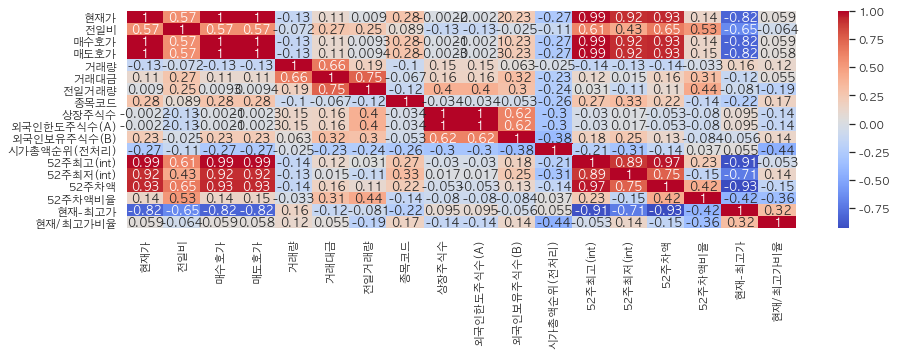

In [14]:
plt.figure(figsize=(15, 4))
sns.heatmap(kospi_corr, cmap="coolwarm", annot=True)

In [15]:
num_desc = 코스피.set_index("종목명").describe()
num_cols = num_desc.columns.tolist()
num_cols.append("종목명")

In [16]:
item_corr = 코스피[num_cols].set_index("종목명").T.corr()

In [17]:
item_corr["신풍제약"].sort_values()

종목명
JW중외제약2우B    0.264188
명문제약         0.698568
JW중외제약우      0.723393
유유제약2우B      0.865578
일양약품우        0.888459
녹십자홀딩스2우     0.907153
광동제약         0.981056
현대약품         0.983552
신풍제약우        0.984527
동아에스티        0.985276
유한양행우        0.986818
유한양행         0.989358
셀트리온         0.989776
삼진제약         0.989879
일성신약         0.990011
이연제약         0.990053
녹십자          0.990656
환인제약         0.990738
한미약품         0.991269
하나제약         0.991493
종근당홀딩스       0.991562
일동홀딩스        0.991918
경보제약         0.991967
대원제약         0.992109
SK바이오팜       0.992144
동아쏘시오홀딩스     0.992162
한미사이언스       0.992313
종근당          0.992343
삼성바이오로직스     0.992774
유유제약         0.992933
제일약품         0.993024
대웅제약         0.993046
코스맥스비티아이     0.993049
에이프로젠제약      0.993115
한독           0.993156
JW홀딩스        0.993163
삼성제약         0.993186
JW생명과학       0.993241
녹십자홀딩스       0.993372
삼일제약         0.993471
제일파마홀딩스      0.993557
보령제약         0.993566
국제약품         0.993576
유유제약1우       0.993640
일동제약         0.993729
한올바이오파